# Proyecto 1 (Inteligencia de Negocios)

## Roles

- **Lider de Datos** --- Juan Nicolas Suarez
- **Lider de Analitica** --- David Santiago Carillo
- **Lider de Negocio** --- Mauricio Martinez Urbaneja



## Objetivo principal del proyecto

- Vincular de forma automática las opiniones de la ciudadanía con los Objetivos de Desarrollo
Sostenible (ODS) 1, 3 y 4

    **1.“Fin de la pobreza”** 

    **3.“Salud y bienestar”**

    **4.“Educación de calidad”**

## Etapa 1 del Proyecto

## Objetivo Etapa 1
- Aplicar la metodología de analítica de textos para la construcción de soluciones de analítica alineadas con los objetivos de organizaciones en un contexto de aplicación.


## Tareas

1. Canvas de aprendizaje automatico

## Modelo de Machine Learning

### 1. Instalacion e importacion de librerias

In [55]:
#!pip uninstall -y pandas-profiling


In [56]:
#!pip install -U "visions[type_image_path]>=0.7.5,<0.8.2"


In [57]:
#!pip install -U ydata-profiling

In [58]:
#!pip install numba==0.56.4


In [59]:
#%pip install "numpy==1.26.4"

#%pip install nltk "spacy<3.8"




In [60]:
#!python -m spacy download es_core_news_sm

In [61]:
# librería Natural Language Toolkit, usada para trabajar con textos
import nltk
# Punkt permite separar un texto en frases.
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\juani\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [62]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\juani\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

### 1.1 Descargar Stopwords y lema de palabras

In [63]:
# StopWords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\juani\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [64]:
#WordNetLemmatizer (lema)
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\juani\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [65]:
# Instalación de librerias
import pandas as pd
import numpy as np
import seaborn as sns
!{sys.executable} -m pip install pandas-profiling

import re, string, unicodedata
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
import spacy
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline   # OJO: de imblearn, no de sklearn


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix , ConfusionMatrixDisplay , roc_curve, roc_auc_score

from collections import Counter


from sklearn.base import BaseEstimator, ClassifierMixin
#from ydata_profiling import ProfileReport 
import matplotlib.pyplot as plt

'{sys.executable}' is not recognized as an internal or external command,
operable program or batch file.


In [66]:
print(spacy.__version__)


3.7.5


### 2.Perfilamiento y entendmiento de los datos

### 2.1 Lectura de los datos

In [67]:
df_text = pd.read_excel('data/Datos_proyecto.xlsx' )
df_textC = df_text

In [68]:
df_textC

,textos,labels
0,"""Aprendizaje"" y ""educación"" se consideran sinó...",4
1,Para los niños más pequeños (bebés y niños peq...,4
2,"Además, la formación de especialistas en medic...",3
3,En los países de la OCDE se tiende a pasar de ...,4
4,Este grupo se centró en las personas que padec...,3
...,...,...
2419,La tutoría de carrera está diseñada para apoya...,4
2420,Fuente: Ministerio de Educación. Las Tasas Int...,4
2421,"Y desde 2010, el PNUD ha sido pionero en la pu...",1
2422,"Sin embargo, estas fallas del mercado implican...",3


In [69]:
df_textC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2424 entries, 0 to 2423
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   textos  2424 non-null   object
 1   labels  2424 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 38.0+ KB


### 2.2 Estadisticas Descriptivas
Vamos a analizar los textos por medio de **maximo** , **minimo** y **moda** 

In [70]:
from collections import Counter

texts = df_textC.copy()
texts['Count'] = [len(x) for x in texts['textos']]
texts['Max'] = [[max([len(x) for x in i.split(' ')])][0] for i in texts['textos']]
texts['Min'] = [[min([len(x) for x in i.split(' ')])][0] for i in texts['textos']]
texts["Moda"] = [Counter(i.split(" ")).most_common(1)[0][0] for i in texts["textos"] ]
#ProfileReport(texts)

In [71]:
texts

,textos,labels,Count,Max,Min,Moda
0,"""Aprendizaje"" y ""educación"" se consideran sinó...",4,352,14,1,de
1,Para los niños más pequeños (bebés y niños peq...,4,516,16,1,y
2,"Además, la formación de especialistas en medic...",3,659,15,1,de
3,En los países de la OCDE se tiende a pasar de ...,4,693,18,1,de
4,Este grupo se centró en las personas que padec...,3,608,14,0,de
...,...,...,...,...,...,...
2419,La tutoría de carrera está diseñada para apoya...,4,741,16,1,de
2420,Fuente: Ministerio de Educación. Las Tasas Int...,4,541,15,1,de
2421,"Y desde 2010, el PNUD ha sido pionero en la pu...",1,352,12,1,el
2422,"Sin embargo, estas fallas del mercado implican...",3,754,15,1,el


### Distribucion de la variable labels

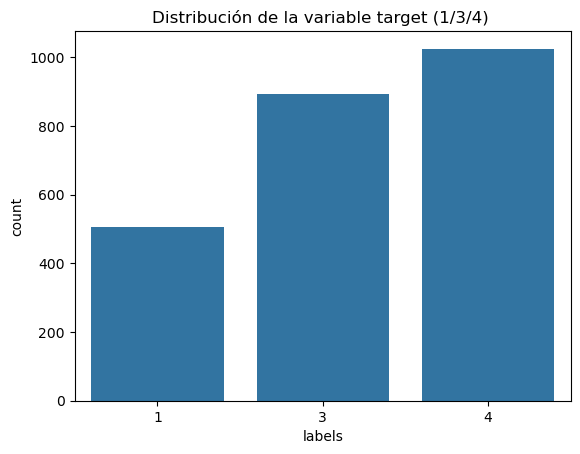

In [72]:
sns.countplot(x="labels", data=df_textC)
plt.title("Distribución de la variable target (1/3/4) ")
plt.show()

Como podemos ver hay una diferencia notable del label 1 ("Fin de la pobreza") con respecto a las demas . Modelaremos asi para pobrar como se comporta el modelo.

### 3. Preparación de datos

### 3.1 Limpieza de datos

In [73]:
"""Remove non-ASCII characters from list of tokenized words"""
def remove_non_ascii(words):
    new_words = []
    for word in words:
        if word is not None:
          new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
          new_words.append(new_word)
    return new_words

"""Convert all characters to lowercase from list of tokenized words """
def to_lowercase(words):
    return [ word.lower() for word in words]

"""Remove punctuation from list of tokenized words"""
def remove_punctuation(words):
    new_words = []
    for word in words:
        if word is not None:
            new_word = re.sub(r'[^\w\s]', '', word)
            if new_word != '':
                new_words.append(new_word)
    return new_words

"""Remove stop words from list of tokenized words"""
def remove_stopwords(words):
    stop_words = set(stopwords.words("spanish"))
    return [w for w in words if w.lower() not in stop_words]
  
"""Make all transformations to text"""
def preprocessing(words):
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    return words






### 3.2 Tokenizacion
Obtenemos todas las palabras separadas para usarlo en el analisis

In [74]:
df_textC['palabras'] = df_textC['textos'].apply(word_tokenize)

df_textC.head()


,textos,labels,palabras
0,"""Aprendizaje"" y ""educación"" se consideran sinó...",4,"[``, Aprendizaje, '', y, ``, educación, '', se..."
1,Para los niños más pequeños (bebés y niños peq...,4,"[Para, los, niños, más, pequeños, (, bebés, y,..."
2,"Además, la formación de especialistas en medic...",3,"[Además, ,, la, formación, de, especialistas, ..."
3,En los países de la OCDE se tiende a pasar de ...,4,"[En, los, países, de, la, OCDE, se, tiende, a,..."
4,Este grupo se centró en las personas que padec...,3,"[Este, grupo, se, centró, en, las, personas, q..."


Le aplicamos el procesamiento para quitar puntuaciones , stopwords y pasar todas las palabras a minuscula.

In [75]:
df_textC['palabrasProces'] = df_textC['palabras'].apply(preprocessing)

df_textC.head()

,textos,labels,palabras,palabrasProces
0,"""Aprendizaje"" y ""educación"" se consideran sinó...",4,"[``, Aprendizaje, '', y, ``, educación, '', se...","[aprendizaje, educacion, consideran, sinonimos..."
1,Para los niños más pequeños (bebés y niños peq...,4,"[Para, los, niños, más, pequeños, (, bebés, y,...","[ninos, mas, pequenos, bebes, ninos, pequenos,..."
2,"Además, la formación de especialistas en medic...",3,"[Además, ,, la, formación, de, especialistas, ...","[ademas, formacion, especialistas, medicina, g..."
3,En los países de la OCDE se tiende a pasar de ...,4,"[En, los, países, de, la, OCDE, se, tiende, a,...","[paises, ocde, tiende, pasar, cursos, obligato..."
4,Este grupo se centró en las personas que padec...,3,"[Este, grupo, se, centró, en, las, personas, q...","[grupo, centro, personas, padecen, trastornos,..."


### 3.2 Normalizacion

In [76]:
import spacy
# Stemmer para palabras en español
stemmer = SnowballStemmer("spanish")

# Load spaCy Spanish model
nlp = spacy.load("es_core_news_sm")



def stem_words(words):
    """Stem words in list of tokenized words (Spanish)."""
    return [stemmer.stem(w) for w in words]

def lemmatize_verbs(words):
    """Lemmatize words in list of tokenized words (Spanish)."""
    doc = nlp(" ".join(words))
    # Return lemmas, focusing on verbs (if you want *all words*, remove the if check)
    return [token.lemma_ for token in doc]

def stem_and_lemmatize(words):
    """Combine stems and lemmas (verbs) if needed."""
    stems = stem_words(words)
    lemmas = lemmatize_verbs(words)
    return stems + lemmas

df_textC['palabras']=df_textC['palabrasProces'].apply(stem_and_lemmatize)

df_textC.head()

,textos,labels,palabras,palabrasProces
0,"""Aprendizaje"" y ""educación"" se consideran sinó...",4,"[aprendizaj, educ, consider, sinon, escolariz,...","[aprendizaje, educacion, consideran, sinonimos..."
1,Para los niños más pequeños (bebés y niños peq...,4,"[nin, mas, pequen, beb, nin, pequen, capacit, ...","[ninos, mas, pequenos, bebes, ninos, pequenos,..."
2,"Además, la formación de especialistas en medic...",3,"[adem, formacion, especial, medicin, general, ...","[ademas, formacion, especialistas, medicina, g..."
3,En los países de la OCDE se tiende a pasar de ...,4,"[pais, ocde, tiend, pas, curs, obligatori, opt...","[paises, ocde, tiende, pasar, cursos, obligato..."
4,Este grupo se centró en las personas que padec...,3,"[grup, centr, person, padec, trastorn, mental,...","[grupo, centro, personas, padecen, trastornos,..."


In [77]:
df_textC.sample(20)

,textos,labels,palabras,palabrasProces
291,Los maestros de primaria se especializan en ed...,4,"[maestr, primari, especializ, educ, pued, espe...","[maestros, primaria, especializan, educacion, ..."
2412,"En cambio, los sistemas educativos que contien...",4,"[cambi, sistem, educ, contien, gran, proporcio...","[cambio, sistemas, educativos, contienen, gran..."
347,"Sin embargo, debido a una situación presupuest...",3,"[embarg, deb, situacion, presupuestari, favor,...","[embargo, debido, situacion, presupuestaria, f..."
2153,En el caso de los alumnos procedentes de entor...,4,"[cas, alumn, procedent, entorn, desfavorec, au...","[caso, alumnos, procedentes, entornos, desfavo..."
709,La densidad de camas también es marcadamente b...,3,"[densid, cam, tambi, marcad, baj, 16, cam, 1, ...","[densidad, camas, tambien, marcadamente, baja,..."
1829,Los subsidios a la vivienda de los gobiernos r...,1,"[subsidi, viviend, gobi, regional, represent, ...","[subsidios, vivienda, gobiernos, regionales, r..."
1667,Este desafío ha sido reconocido por el MoES en...,4,"[desafi, sid, reconoc, moes, analisis, planif,...","[desafio, sido, reconocido, moes, analisis, pl..."
197,Use un enfoque diferenciado para llegar a los ...,4,"[use, enfoqu, diferenci, lleg, estudi, diferen...","[use, enfoque, diferenciado, llegar, estudiant..."
1417,Ofrecer más oportunidades de aprendizaje colab...,4,"[ofrec, mas, oportun, aprendizaj, colabor, inf...","[ofrecer, mas, oportunidades, aprendizaje, col..."
2271,"Los hombres fuman relativamente mucho, y entre...",3,"[hombr, fum, relat, mujer, arab, mayor, obes, ...","[hombres, fuman, relativamente, mujeres, arabe..."


### 3.3 Entrenamiento y split de los datos para testing

In [78]:
X = df_textC["palabras"]                 # list of tokens per row
y = df_textC["labels"].astype(int)     # already numeric; ensure int dtype

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### 3.4 Vectorizar texto ya tokenizado

 TF-IDF : Term Frequency-Inverse Document Frequency

In [79]:
identity = lambda x: x
vec_tfidf = TfidfVectorizer(
    tokenizer=identity, preprocessor=identity, token_pattern=None,
    # sublinear_tf=True, min_df=2, ngram_range=(1,2)
)

X_train_tfidf = vec_tfidf.fit_transform(X_train)
X_test_tfidf  = vec_tfidf.transform(X_test)



### 4.1 Entrenar primer modelo de clasificacion

#### 4.1.1 LinearSVC (David Carrillo)

Para este caso se escogió LinearSVC porque los datos provienen de texto vectorizado con TF-IDF, lo que genera un espacio de alta dimensión y disperso. Los SVM lineales son especialmente adecuados para este tipo de representaciones, ya que encuentran fronteras claras entre clases con buen rendimiento computacional y suelen superar a modelos más simples como la regresión logística en tareas de clasificación de texto.

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import pandas as pd

# Unimos tokens procesados de nuevo en string (TfidfVectorizer espera texto plano)
X_train_text = [" ".join(tokens) for tokens in X_train]
X_test_text  = [" ".join(tokens) for tokens in X_test]

# Definir pipeline: TF-IDF + LinearSVC
svm_pipeline = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("clf", LinearSVC(random_state=42))
])

# Entrenar
svm_pipeline.fit(X_train_text, y_train)

# Predicciones
y_train_pred = svm_pipeline.predict(X_train_text)
y_test_pred  = svm_pipeline.predict(X_test_text)

# Reportes como DataFrame
report_train = classification_report(y_train, y_train_pred, output_dict=True)
report_test  = classification_report(y_test, y_test_pred, output_dict=True)

df_report_train = pd.DataFrame(report_train).transpose()
df_report_test  = pd.DataFrame(report_test).transpose()

print("=== Resultados en TRAIN ===")
display(df_report_train)

print("\n=== Resultados en TEST ===")
display(df_report_test)


=== Resultados en TRAIN ===


,precision,recall,f1-score,support
1,1.0,1.0,1.0,404.0
3,1.0,1.0,1.0,715.0
4,1.0,1.0,1.0,820.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,1939.0
weighted avg,1.0,1.0,1.0,1939.0



=== Resultados en TEST ===


,precision,recall,f1-score,support
1,0.959596,0.940594,0.950000,101.000000
3,0.956284,0.977654,0.966851,179.000000
4,0.985222,0.975610,0.980392,205.000000
accuracy,0.969072,0.969072,0.969072,0.969072
macro avg,0.967034,0.964619,0.965748,485.000000
weighted avg,0.969205,0.969072,0.969065,485.000000


- Los resultados muestran que el modelo mantiene una consistencia adecuada: aunque en entrenamiento alcanza valores perfectos (100%), en el conjunto de prueba se conserva un desempeño alto (≈96.9%), lo que indica que no hay una brecha fuerte entre ambos.

- Al revisar las métricas por clase, se observa que todas tienen desempeños similares en precisión, recall y f1-score, lo cual confirma que el modelo no se inclina de manera marcada hacia una sola categoría.

- El nivel de exactitud es elevado, lo que refuerza la validez del modelo; sin embargo, para confirmar que no depende únicamente de cómo se dividieron los datos, se aplicará validación cruzada como paso adicional.

- Finalmente, se planea entrenar una versión del modelo con datos balanceados (usando técnicas como SMOTE), con el fin de mejorar la equidad entre clases y evitar que el algoritmo simplemente memorice los datos disponibles.

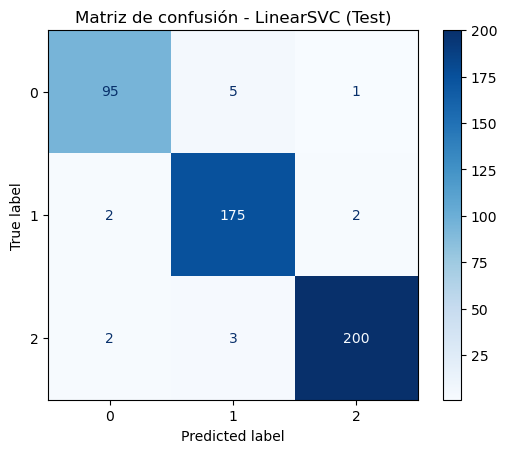

In [81]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Matriz de confusión para test
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de confusión - LinearSVC (Test)")
plt.show()


### 4.1.2 Cross Validation

Accuracy por fold: [0.96907216 0.98556701 0.96082474 0.98762887 0.97520661]
Accuracy promedio: 0.9756598790150806


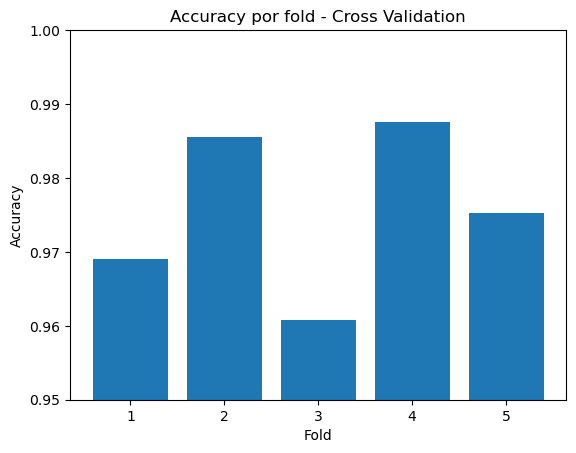

In [82]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

scores = cross_val_score(svm_pipeline, [" ".join(tokens) for tokens in X], y, cv=5, scoring="accuracy")
print("Accuracy por fold:", scores)
print("Accuracy promedio:", scores.mean())


plt.bar(range(1, len(scores)+1), scores)
plt.title("Accuracy por fold - Cross Validation")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.ylim(0.95, 1.0)  # para resaltar pequeñas diferencias
plt.show()


En la Figura se muestra la variación del accuracy obtenida en cada una de las cinco particiones de la validación cruzada. Los valores se mantienen en un rango entre 96% y 98%, lo cual evidencia que el modelo LinearSVC conserva un rendimiento estable y no depende de un corte específico de los datos. El promedio general fue de 97.5%, confirmando la solidez y capacidad de generalización del modelo frente a distintas divisiones del conjunto

#### 4.1.3 SMOTE


Previo al entrenamiento, los datos fueron vectorizados con TF-IDF, lo que permitió transformar los textos en representaciones numéricas de alta dimensión. Sin embargo, al analizar la distribución de clases se observó cierto desbalance, lo cual puede afectar el desempeño del modelo en categorías con menos ejemplos. Para mitigar este problema se aplicó SMOTE (Synthetic Minority Oversampling Technique), que genera ejemplos sintéticos de las clases minoritarias hasta equilibrar el conjunto de datos.

In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. Convertir tokens a string
X_text = [" ".join(tokens) for tokens in X]

# 2. Vectorizar con TF-IDF
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X_text)

print("Tamaño original (sin SMOTE):", X_vectorized.shape)


Tamaño original (sin SMOTE): (2424, 16640)


Con esta técnica el tamaño del dataset pasó de 2424 muestras a 3075 muestras, logrando un balance entre las tres clases. 

Tamaño con SMOTE: (3075, 16640)
Accuracy por fold con SMOTE: [0.98211382 0.9804878  0.98373984 0.98861789 0.99186992]
Accuracy promedio con SMOTE: 0.9853658536585366

=== Reporte con SMOTE (Test) ===
              precision    recall  f1-score   support

           1       0.98      0.98      0.98       205
           3       0.98      0.96      0.97       205
           4       0.98      0.99      0.98       205

    accuracy                           0.98       615
   macro avg       0.98      0.98      0.98       615
weighted avg       0.98      0.98      0.98       615



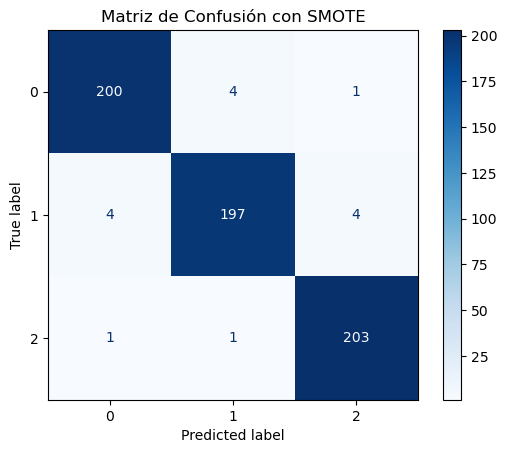

In [84]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 3. Aplicar SMOTE para balancear
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_vectorized, y)

print("Tamaño con SMOTE:", X_resampled.shape)

# 4. Validación cruzada con LinearSVC
clf = LinearSVC(random_state=42)
scores = cross_val_score(clf, X_resampled, y_resampled, cv=5, scoring="accuracy")
print("Accuracy por fold con SMOTE:", scores)
print("Accuracy promedio con SMOTE:", scores.mean())

# 5. Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("\n=== Reporte con SMOTE (Test) ===")
print(classification_report(y_test, y_pred))

# 6. Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión con SMOTE")
plt.show()


Al entrenar nuevamente el modelo LinearSVC con estos datos balanceados y evaluar mediante validación cruzada, se obtuvo un accuracy promedio de aproximadamente 98.5%, superior al alcanzado sin balanceo (≈97.5%). En el conjunto de prueba, los resultados mostraron métricas muy homogéneas entre clases, con valores de precision, recall y f1-score cercanos a 0.98 para todas ellas.

#### 4.1.4 Palabras mas usadas

Para interpretar el modelo y comprender qué términos influyen más en la clasificación, se extraen los coeficientes del LinearSVC asociados a cada clase. Estos coeficientes reflejan el peso que tiene cada palabra (según la representación TF-IDF) para decidir la pertenencia a una categoría. A continuación, se muestran las 10 palabras más asociadas y las 10 menos asociadas a cada clase en forma de tabla.

In [85]:
import numpy as np

# 1. Volvemos a entrenar con todo el dataset balanceado
clf = LinearSVC(random_state=42)
clf.fit(X_resampled, y_resampled)

# 2. Recuperamos las palabras del vectorizador
feature_names = vectorizer.get_feature_names_out()

# 3. Mostrar top palabras por clase
def show_words(list_words):
    for w in list_words:
        print(f"- {w}")

for i, clase in enumerate(clf.classes_):
    coef = clf.coef_[i]

    # Top 10 palabras más asociadas a esta clase
    top_pos = np.argsort(coef)[-10:]
    # Top 10 menos asociadas (indicativas de otras clases)
    top_neg = np.argsort(coef)[:10]

    print(f"\n=== Clase {clase} ===")
    print("Palabras más asociadas:")
    show_words(feature_names[top_pos])

    print("Palabras menos asociadas:")
    show_words(feature_names[top_neg])



=== Clase 1 ===
Palabras más asociadas:
- ipm
- pobrezar
- hogar
- social
- proteccion
- pobre
- pobr
- privacion
- pobreza
- pobrez
Palabras menos asociadas:
- salud
- educ
- enfermedad
- atencion
- escuel
- escuela
- ocde
- estudi
- alcohol
- educativo

=== Clase 3 ===
Palabras más asociadas:
- medico
- mental
- sanitario
- sanitari
- hospital
- alcohol
- medic
- enfermedad
- atencion
- salud
Palabras menos asociadas:
- pobrez
- educ
- pobreza
- educacion
- estudi
- escuel
- escolar
- escuela
- profesor
- pobr

=== Clase 4 ===
Palabras más asociadas:
- alumno
- estudiante
- escolar
- profesor
- educativo
- escuela
- educacion
- escuel
- estudi
- educ
Palabras menos asociadas:
- salud
- pobrez
- pobreza
- medic
- atencion
- mental
- hospital
- enfermedad
- pobre
- pobr


In [86]:
import pandas as pd
import numpy as np

# 1. Entrenamos el modelo con todos los datos balanceados
clf = LinearSVC(random_state=42)
clf.fit(X_resampled, y_resampled)

# 2. Obtenemos nombres de las features
feature_names = vectorizer.get_feature_names_out()

# 3. Construimos una tabla con top palabras por clase
tables = {}
for i, clase in enumerate(clf.classes_):
    coef = clf.coef_[i]
    top_pos = np.argsort(coef)[-10:][::-1]   # top 10 positivas
    top_neg = np.argsort(coef)[:10]          # top 10 negativas
    
    df_class = pd.DataFrame({
        "Palabras más asociadas": feature_names[top_pos],
        "Peso (+)": coef[top_pos],
        "Palabras menos asociadas": feature_names[top_neg],
        "Peso (-)": coef[top_neg]
    })
    tables[clase] = df_class

# 4. Mostramos cada tabla por clase
for clase, tabla in tables.items():
    print(f"\n=== Clase {clase} ===")
    display(tabla)



=== Clase 1 ===


,Palabras más asociadas,Peso (+),Palabras menos asociadas,Peso (-)
0,pobrez,4.128099,salud,-2.091963
1,pobreza,2.732490,educ,-1.319444
2,privacion,2.004493,enfermedad,-1.277498
3,pobr,1.840942,atencion,-1.218214
4,pobre,1.840942,escuel,-1.104474
5,proteccion,1.536613,escuela,-1.047657
6,social,1.341796,ocde,-0.966019
7,hogar,1.335556,estudi,-0.946747
8,pobrezar,1.234391,alcohol,-0.922569
9,ipm,1.086266,educativo,-0.905889



=== Clase 3 ===


,Palabras más asociadas,Peso (+),Palabras menos asociadas,Peso (-)
0,salud,4.127435,pobrez,-2.600253
1,atencion,2.094372,educ,-2.321097
2,enfermedad,2.047389,pobreza,-1.876760
3,medic,1.723641,educacion,-1.780080
4,alcohol,1.678766,estudi,-1.467355
5,hospital,1.612223,escuel,-1.356784
6,sanitari,1.484237,escolar,-1.324469
7,sanitario,1.428126,escuela,-1.187418
8,mental,1.416655,profesor,-1.182125
9,medico,1.273725,pobr,-1.156052



=== Clase 4 ===


,Palabras más asociadas,Peso (+),Palabras menos asociadas,Peso (-)
0,educ,3.195078,salud,-2.831599
1,estudi,2.201329,pobrez,-2.092546
2,escuel,2.136372,pobreza,-1.420296
3,educacion,2.068965,medic,-1.242746
4,escuela,1.923513,atencion,-1.227675
5,educativo,1.753616,mental,-1.100206
6,profesor,1.694762,hospital,-1.071006
7,escolar,1.678972,enfermedad,-1.038338
8,estudiante,1.476376,pobre,-0.958293
9,alumno,1.280658,pobr,-0.958293


### 4.1.4 Conclusion 

La aplicación de LinearSVC con datos vectorizados en TF-IDF y balanceados con SMOTE permitió obtener un modelo robusto, consistente y justo entre clases. Los resultados confirman que el modelo no solo generaliza bien, sino que además evita el sesgo hacia categorías mayoritarias, alcanzando un rendimiento global muy alto (≈98%). Este enfoque se valida como una solución adecuada para la clasificación de los textos en el presente caso de estudio.

### 4.2 Segundo Modelo Regresión Logistica (Juan Nicolas)

#### 4.2.1 Regresión Logistica

In [87]:
X = df_textC["palabras"]                 # list of tokens per row
y = df_textC["labels"].astype(int)     # already numeric; ensure int dtype

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [88]:
identity = lambda x: x
vec_tfidf = TfidfVectorizer(
    tokenizer=identity, preprocessor=identity, token_pattern=None,
    # sublinear_tf=True, min_df=2, ngram_range=(1,2)
)

X_train_tfidf = vec_tfidf.fit_transform(X_train)
X_test_tfidf  = vec_tfidf.transform(X_test)


clf = LogisticRegression(max_iter=200, n_jobs=None)  
clf.fit(X_train_tfidf, y_train)


# Evaluación en TRAIN
y_train_pred = clf.predict(X_train_tfidf)
print("TRAIN:")
print(classification_report(y_train, y_train_pred, digits=3))

# Evaluación en TEST
y_test_pred = clf.predict(X_test_tfidf) 
print("TEST:")
print(classification_report(y_test, y_test_pred, digits=3))


TRAIN:
              precision    recall  f1-score   support

           1      1.000     0.990     0.995       404
           3      0.997     0.996     0.997       715
           4      0.993     0.999     0.996       820

    accuracy                          0.996      1939
   macro avg      0.997     0.995     0.996      1939
weighted avg      0.996     0.996     0.996      1939

TEST:
              precision    recall  f1-score   support

           1      0.969     0.921     0.944       101
           3      0.961     0.966     0.964       179
           4      0.962     0.980     0.971       205

    accuracy                          0.963       485
   macro avg      0.964     0.956     0.960       485
weighted avg      0.963     0.963     0.963       485



1. Los resultados muestran que el modelo se desempeña de manera consistente, ya que el accuracy en entrenamiento (99.6%) y en prueba (96.3%) es muy similar, lo que indica que no hay señales evidentes de sobreajuste.
2. El rendimiento entre las distintas clases también es equilibrado: las métricas de precisión, recall y f1-score se mantienen altas y sin grandes diferencias entre categorías, lo que evidencia que el modelo no está favoreciendo a una clase en particular.
3. El alto nivel de accuracy alcanzado justifica realizar una validación adicional mediante cross-validation, con el fin de confirmar que el buen desempeño no se deba únicamente a la partición específica entre entrenamiento y prueba.
4. Finalmente, se propone reforzar el entrenamiento con datos balanceados para reducir posibles sesgos en la distribución de clases y garantizar que el modelo generalice mejor en futuros escenarios.

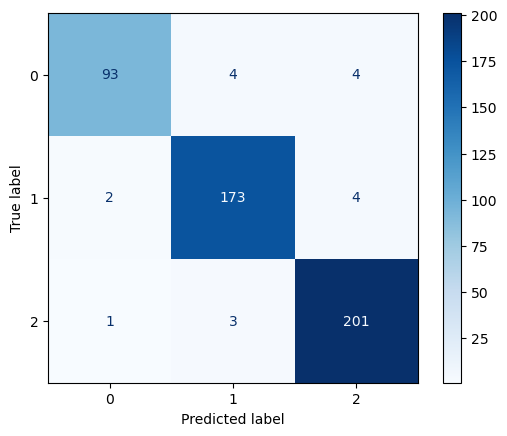

In [89]:
cm = confusion_matrix(y_test, y_test_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

### Mismo modelo (Regresion logistica)

#### 4.2.2  Regresion logistica con cross validation


In [90]:
# Define el pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(tokenizer=lambda x: x, preprocessor=lambda x: x, token_pattern=None)),  # Vectorización TF-IDF
    ('clf', LogisticRegression(max_iter=200))  # Modelo de regresión logística
])

# Cross-validation (5 pliegues)
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')  # Cambia 'accuracy' por otra métrica si quieres

# Resultados
print(f"Cross-validation scores: {cv_scores}")
print(f"Promedio del accuracy (CV): {cv_scores.mean():.3f}")

Cross-validation scores: [0.96494845 0.97938144 0.95670103 0.97525773 0.9731405 ]
Promedio del accuracy (CV): 0.970


Como podemos ver los resultados del primer modelo si tienen sentido. el promedio del accurracy no varia mucho.

A pesar de que esta dando buenos resultados el modelo , decidimos balancear la clase minoritaria para evitar overfitting del modelo.

### Mismo modelo (Regresion logistica)

#### 4.2.3 Regresion logistica con SMOTE



In [91]:
X = df_textC["palabras"]
y = df_textC["labels"].astype(int)

# 1. Definir el pipeline
pipelineLogisticReg = ImbPipeline([
    ('tfidf', TfidfVectorizer(tokenizer=lambda x: x, preprocessor=lambda x: x, token_pattern=None)),
    ('smote', SMOTE(sampling_strategy='minority', random_state=42)),
    ('clf', LogisticRegression(max_iter=200))
])



In [92]:
# 2. Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#### 4.2.4  Aplicacion de SMOTE


In [93]:

tfidf = pipelineLogisticReg.named_steps['tfidf']
smote_step = pipelineLogisticReg.named_steps['smote']

X_tfidf = tfidf.fit_transform(X_train)        
X_res, y_res = smote_step.fit_resample(X_tfidf, y_train)  # aplicar smote

print("Antes de SMOTE:")
print(y_train.value_counts())
print("\nDespués de SMOTE:")
print(y_res.value_counts())



Antes de SMOTE:
labels
4    820
3    715
1    404
Name: count, dtype: int64

Después de SMOTE:
labels
1    820
4    820
3    715
Name: count, dtype: int64


In [94]:
# 3. Entrenar pipeline
pipelineLogisticReg.fit(X_train, y_train)

## Resultados
# Evaluación en TRAIN
y_train_pred = pipelineLogisticReg.predict(X_train)
print("TRAIN:")
print(classification_report(y_train, y_train_pred, digits=3))




# 4. Evaluación en test
y_pred = pipelineLogisticReg.predict(X_test)
print("TEST:")
print(classification_report(y_test, y_pred, digits=3))

TRAIN:
              precision    recall  f1-score   support

           1      0.985     0.995     0.990       404
           3      0.997     0.992     0.994       715
           4      0.996     0.996     0.996       820

    accuracy                          0.994      1939
   macro avg      0.993     0.994     0.994      1939
weighted avg      0.994     0.994     0.994      1939

TEST:
              precision    recall  f1-score   support

           1      0.960     0.941     0.950       101
           3      0.966     0.966     0.966       179
           4      0.966     0.976     0.971       205

    accuracy                          0.965       485
   macro avg      0.964     0.961     0.962       485
weighted avg      0.965     0.965     0.965       485



Después de aplicar SMOTE para balancear las clases y entrenar un modelo de Regresión Logística con cross validation, los resultados muestran un desempeño sólido y consistente. El modelo alcanza un accuracy del 99.4% en entrenamiento y 96.5% en prueba, con métricas de precisión, recall y f1-score equilibradas entre las clases, lo que indica ausencia de sobreajuste y buena capacidad de generalización; en conjunto.

### Palabras mas utilizadas por el en TF-IDF

Queremos ver que palabras usa el modelo para clasificar la clase.

In [95]:
def show_words(list_words):
    """Muestra las palabras más y menos asociadas a cada clase."""
    for i in (list_words):
        print(f"- {i}")
    


vectorizer = pipelineLogisticReg.named_steps['tfidf']
clf = pipelineLogisticReg.named_steps['clf']


feature_names = vectorizer.get_feature_names_out()
for i, clase in enumerate(clf.classes_):
    coef = clf.coef_[i]
    top_pos = np.argsort(coef)[-10:]   # top 10 positivas
    top_neg = np.argsort(coef)[:10]    # top 10 negativas
    print(f"\nClase {clase}:")
    print("Palabras más asociadas:")
    show_words(feature_names[top_pos])
    print("Palabras menos asociadas:")
    show_words(feature_names[top_neg])


Clase 1:
Palabras más asociadas:
- ingres
- ingreso
- proteccion
- privacion
- social
- hogar
- pobr
- pobre
- pobreza
- pobrez
Palabras menos asociadas:
- salud
- atencion
- ocde
- educ
- escuel
- escuela
- enfermedad
- estudi
- profesional
- personal

Clase 3:
Palabras más asociadas:
- paciente
- sanitari
- medico
- alcohol
- hospital
- mental
- medic
- enfermedad
- atencion
- salud
Palabras menos asociadas:
- pobrez
- educ
- pobreza
- educacion
- escuel
- estudi
- escolar
- pobr
- pobre
- escuela

Clase 4:
Palabras más asociadas:
- docent
- estudiante
- educativo
- profesor
- escolar
- escuela
- estudi
- educacion
- escuel
- educ
Palabras menos asociadas:
- salud
- pobrez
- pobreza
- atencion
- hogar
- social
- enfermedad
- pobre
- pobr
- medic


### 4.3 Entrenamiento del tercer modelo de clasificación (KNN)

#### 4.3.1 Construcción del modelo

In [96]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

clf2=KNeighborsClassifier(n_neighbors=5)
clf2.fit(X_train_tfidf, y_train)

y_train_pred= clf2.predict(X_train_tfidf)
print("TRAIN:")
print(classification_report(y_train, y_train_pred, digits=3))

y_test_pred= clf2.predict(X_test_tfidf)
print("TEST:")
print(classification_report(y_test, y_test_pred, digits=3))

TRAIN:
              precision    recall  f1-score   support

           1      0.925     0.953     0.939       404
           3      0.987     0.961     0.974       715
           4      0.966     0.974     0.970       820

    accuracy                          0.965      1939
   macro avg      0.960     0.963     0.961      1939
weighted avg      0.965     0.965     0.965      1939

TEST:
              precision    recall  f1-score   support

           1      0.848     0.941     0.892       101
           3      0.949     0.939     0.944       179
           4      0.964     0.922     0.943       205

    accuracy                          0.932       485
   macro avg      0.921     0.934     0.926       485
weighted avg      0.935     0.932     0.933       485



Tanto el de prueba como de entrenamiento cuenta con un % de precisión alto y similares.

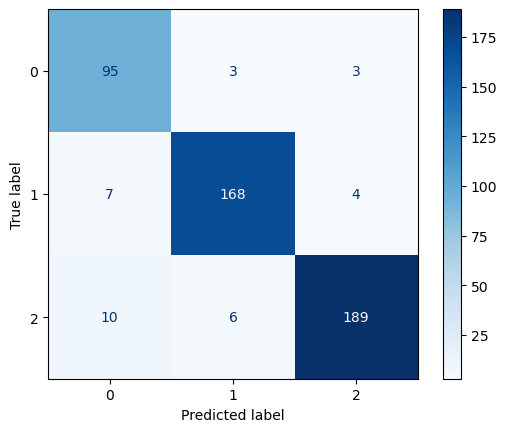

In [97]:
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

#### 4.3.2 Crossvalidation segun el número de vecinos

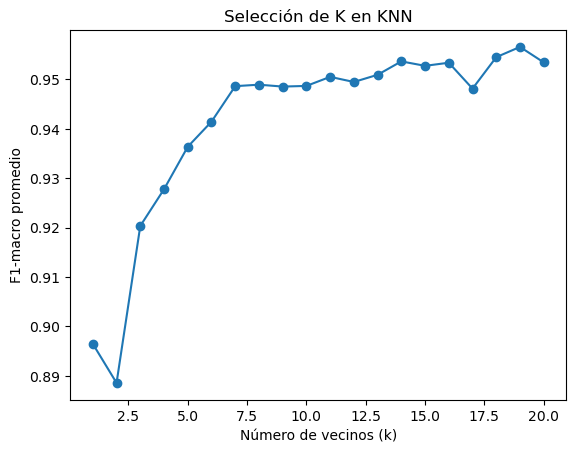

In [98]:
neighbors = range(1, 21)
scores = [cross_val_score(KNeighborsClassifier(n_neighbors=k), X_train_tfidf, y_train, cv=5, scoring="f1_macro").mean() for k in neighbors]
plt.plot(neighbors, scores, marker="o")
plt.xlabel("Número de vecinos (k)")
plt.ylabel("F1-macro promedio")
plt.title("Selección de K en KNN")
plt.show()

El anterior gráfico demuestra que se puede mejorar dicho modelo. Para el primer modelo, se llegaron a utilizar 5 vecinos. Al hacer la cross-validation, se llega a ver como al utilizar 19 vecinos se llega a un mejor f1-promedio.

#### 4.3.3 Balanceo de clases (SMOTE)

In [99]:
from collections import Counter
print("Antes de SMOTE:", Counter(y_train))

Antes de SMOTE: Counter({4: 820, 3: 715, 1: 404})


In [100]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_tfidf, y_train)

In [101]:
print("Después de SMOTE:", Counter(y_train_res))

Después de SMOTE: Counter({3: 820, 1: 820, 4: 820})


In [102]:
knn_clf = KNeighborsClassifier(n_neighbors=5, weights="distance", metric="cosine", n_jobs=-1)
knn_clf.fit(X_train_res, y_train_res)
y_pred = knn_clf.predict(X_test_tfidf)
# Resultados de clasificación
print("=== Resultados del modelo con SMOTE ===")
print(classification_report(y_test, y_pred, digits=3))

=== Resultados del modelo con SMOTE ===
              precision    recall  f1-score   support

           1      0.792     0.980     0.876       101
           3      0.964     0.911     0.937       179
           4      0.969     0.902     0.934       205

    accuracy                          0.922       485
   macro avg      0.908     0.931     0.916       485
weighted avg      0.930     0.922     0.923       485



#### 4.3.4 Optimización de hiperparámetros

In [103]:
from sklearn.model_selection import KFold
# Parametros a probar
param_grid = {
    "n_neighbors": [3, 5, 7, 9, 11, 13, 17, 19],  # número de vecinos
    "weights": ["uniform", "distance"],         # todos iguales o ponderados por distancia
    "metric": ["euclidean", "manhattan", "cosine"]  # diferentes métricas de distancia
}
particiones = KFold(n_splits=5, shuffle=True, random_state = 0)
# GridSearchCV con 5 particiones y F1-macro como métrica
mejor_modelo = GridSearchCV(KNeighborsClassifier(), param_grid, cv=particiones, scoring="f1_macro", n_jobs=-1)
mejor_modelo.fit(X_train_res, y_train_res)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'cosine'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 17, 19],
                         'weights': ['uniform', 'distance']},
             scoring='f1_macro')

In [104]:
mejor_modelo.best_params_

{'metric': 'cosine', 'n_neighbors': 13, 'weights': 'distance'}

In [105]:
knn_final = mejor_modelo.best_estimator_
y_pred = knn_final.predict(X_test_tfidf)
print("=== Resultados del mejor modelo ===")
print(classification_report(y_test, y_pred, digits=3))


=== Resultados del mejor modelo ===
              precision    recall  f1-score   support

           1      0.795     1.000     0.886       101
           3      0.964     0.894     0.928       179
           4      0.969     0.907     0.937       205

    accuracy                          0.922       485
   macro avg      0.909     0.934     0.917       485
weighted avg      0.931     0.922     0.923       485



### Resultados

Despues de aplicar los 3 modelos se selecciono el de regresion logistica , con cross validation y Smote , ya que es el que da un valor mejor valor de accuracy y es consistente entre clases para clasificar.

In [107]:
df_test = pd.read_excel('data/Datos de prueba_proyecto.xlsx')
df_process = df_test.copy()

"""Remove non-ASCII characters from list of tokenized words"""
def remove_non_ascii(words):
    new_words = []
    for word in words:
        if word is not None:
          new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
          new_words.append(new_word)
    return new_words

"""Convert all characters to lowercase from list of tokenized words """
def to_lowercase(words):
    return [ word.lower() for word in words]

"""Remove punctuation from list of tokenized words"""
def remove_punctuation(words):
    new_words = []
    for word in words:
        if word is not None:
            new_word = re.sub(r'[^\w\s]', '', word)
            if new_word != '':
                new_words.append(new_word)
    return new_words

"""Remove stop words from list of tokenized words"""
def remove_stopwords(words):
    stop_words = set(stopwords.words("spanish"))
    return [w for w in words if w.lower() not in stop_words]
  
"""Make all transformations to text"""
def preprocessing(words):
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    return words


df_process['palabras'] = df_process['Textos_espanol'].apply(word_tokenize)
df_process['palabras'] = df_process['palabras'].apply(preprocessing)

#Textos es el texto largo
df_process['palabrasProces'] = df_process['palabras'].apply(preprocessing)

stemmer = SnowballStemmer("spanish")

# Load spaCy Spanish model
nlp = spacy.load("es_core_news_sm")



def stem_words(words):
    """Stem words in list of tokenized words (Spanish)."""
    return [stemmer.stem(w) for w in words]

def lemmatize_verbs(words):
    """Lemmatize words in list of tokenized words (Spanish)."""
    doc = nlp(" ".join(words))
    # Return lemmas, focusing on verbs (if you want *all words*, remove the if check)
    return [token.lemma_ for token in doc]

def stem_and_lemmatize(words):
    """Combine stems and lemmas (verbs) if needed."""
    stems = stem_words(words)
    lemmas = lemmatize_verbs(words)
    return stems + lemmas

df_process['palabras'] = df_process['palabrasProces'].apply(stem_and_lemmatize)

df_test['labels'] = pipelineLogisticReg.predict(df_process['palabras'])
df_test.to_excel("predicciones_ONU.xlsx", index=False)






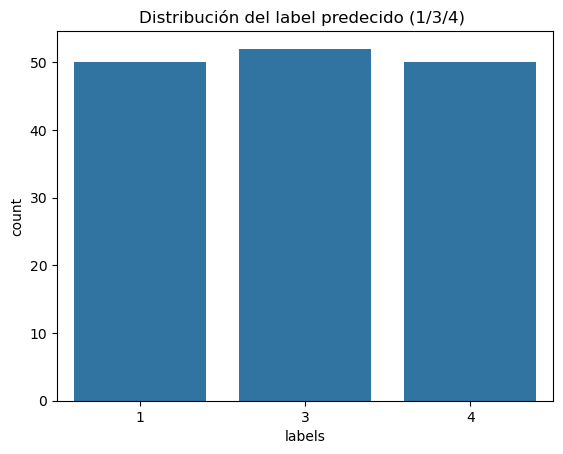

labels
3    52
4    50
1    50
Name: count, dtype: int64

In [ ]:
sns.countplot(x="labels", data=df_test)
plt.title("Distribución del label predecido (1/3/4) ")
plt.show()

df_test['labels'].value_counts()